# Entrainement sur les maisons de l'Essonne en 2022

Ce notebook permet de trouver un modèle pour estimer le prix au mètre carré d'une maison en Essonne d'après les ventes de 2022

In [1]:
import pandas as pd
import gzip
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## I- Introduction


In [2]:
df_maisons = pd.read_csv(r"../data/df_maisons_2022_91.csv")

Affichage des paramètres statistiques des différentes variables du dataframe

In [3]:
df_maisons.describe()

,nb_elements,valeur_fonciere,code_commune,surface_reelle_bati,somme_terrain,local_dependance,local_terrain,nombre_pieces_principales,prix_mcarr_moy_ville,prix_m_carre
count,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000,6428.000000
mean,1.622433,346716.673433,91375.645302,93.364966,484.327629,0.378189,0.244244,4.327785,3724.197549,3878.193498
std,1.067115,107352.363510,200.231639,27.285990,317.216009,0.786895,0.675027,1.112356,634.359663,1240.124958
min,1.000000,53000.000000,91016.000000,31.000000,27.000000,0.000000,0.000000,2.000000,905.797101,410.958904
25%,1.000000,277000.000000,91201.000000,75.000000,301.000000,0.000000,0.000000,4.000000,3331.184474,3106.796117
50%,1.000000,339000.000000,91386.000000,90.000000,421.000000,0.000000,0.000000,4.000000,3591.866915,3708.975834
75%,2.000000,410000.000000,91552.000000,112.000000,593.000000,1.000000,0.000000,5.000000,4216.329014,4465.804598
max,39.000000,675000.000000,91692.000000,161.000000,4570.000000,38.000000,8.000000,7.000000,6001.813700,12571.428571


Affichage grace à un diagramme circulaire du nombre de dépendances par mutation.

On en déduira par la suite, que le nombre de dépendances n'aura pas de poids dans l'estamtion du prix du bien car elles peuvent désigner une cave, une place de parking, un balcon, un garage, une cabane dans le jardin, un grenier ... Mais il n'y a pas plus de précision dans le dataframe.

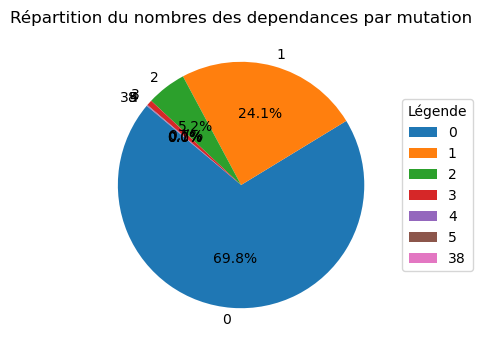

In [4]:
value_counts = df_maisons['local_dependance'].value_counts()

# Créez un diagramme circulaire
plt.figure(figsize=(4, 4))  
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)

# Ajoutez un titre
plt.title("Répartition du nombres des dependances par mutation")
plt.legend(title="Légende", loc="center left", bbox_to_anchor=(1, 0.5))
# Affichez le diagramme
plt.show()

Graphique du prix du bien en fonction du nombre de dépendances

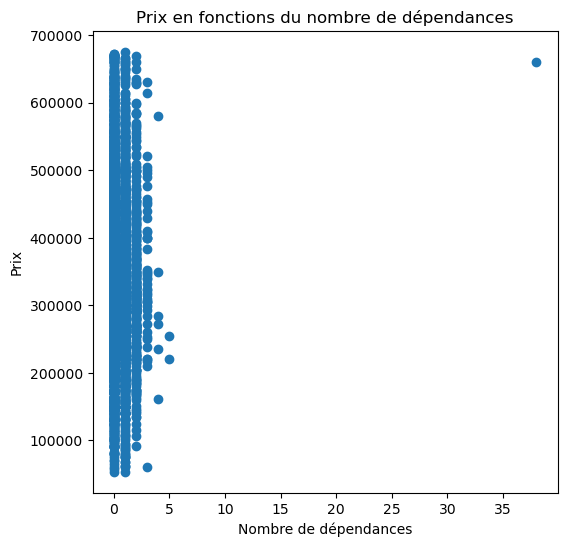

In [5]:
plt.figure(figsize=(6, 6))
# Créer le nuage de points
plt.scatter(x = df_maisons['local_dependance'],
            y = df_maisons['valeur_fonciere'])

# Personnaliser le graphe
plt.title("Prix en fonctions du nombre de dépendances")
plt.xlabel('Nombre de dépendances')
plt.ylabel('Prix')

# Afficher le graphe
plt.show()

En observant ce graphique, on voit que le prix ne dépend pas du nombre de dépendances.


## II- Réduction des données

Nous allons maintenant gérer les valeurs abérantes, en effet certaines maisons ont un prix dérisoire ou très élevé, ainsi qu'une surface, un nombre de pièces, ou une surface de terrain qui pourrait faire perdre de la précision à notre modèle. 

Pour cela, nous allons utiliser un z-score pour réduire le nombre de lignes de notre dataframe. On peut visualiser cette réduction par les boîtes à moustaches suivantes.

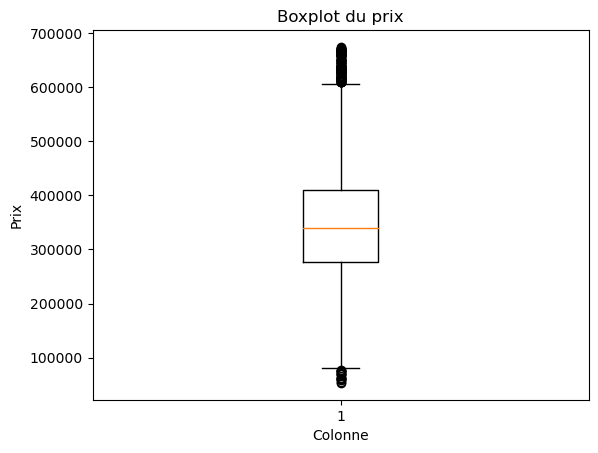

In [6]:
plt.boxplot([df_maisons['valeur_fonciere']])

# Ajouter un titre et des labels d'axe
plt.title('Boxplot du prix')
plt.xlabel('Colonne')
plt.ylabel('Prix')

# Afficher le graphique
plt.show()

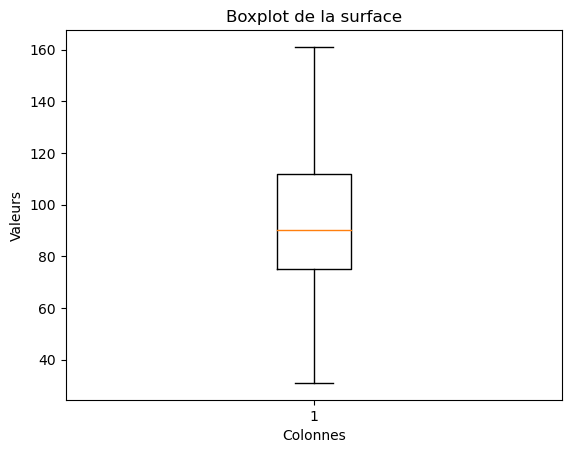

In [7]:
plt.boxplot([df_maisons['surface_reelle_bati']])

# Ajouter un titre et des labels d'axe
plt.title('Boxplot de la surface')
plt.xlabel('Colonnes')
plt.ylabel('Valeurs')

# Afficher le graphique
plt.show()

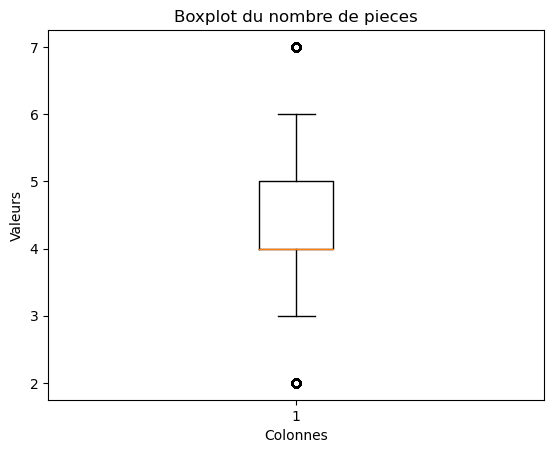

In [8]:
plt.boxplot([df_maisons['nombre_pieces_principales']])

# Ajouter un titre et des labels d'axe
plt.title('Boxplot du nombre de pieces')
plt.xlabel('Colonnes')
plt.ylabel('Valeurs')

# Afficher le graphique
plt.show()

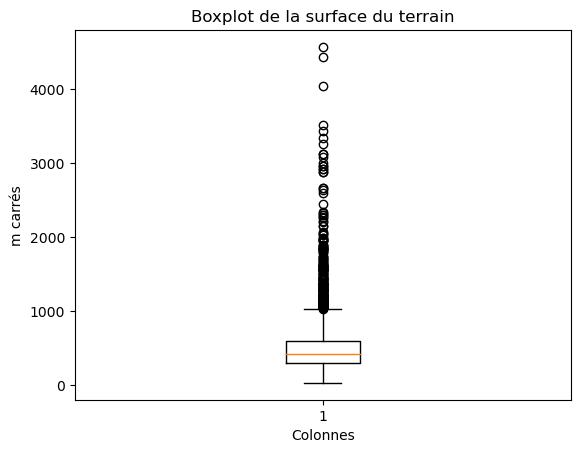

In [9]:
plt.boxplot([df_maisons['somme_terrain']])

# Ajouter un titre et des labels d'axe
plt.title('Boxplot de la surface du terrain')
plt.xlabel('Colonnes')
plt.ylabel('m carrés')

# Afficher le graphique
plt.show()

Essai du z-score

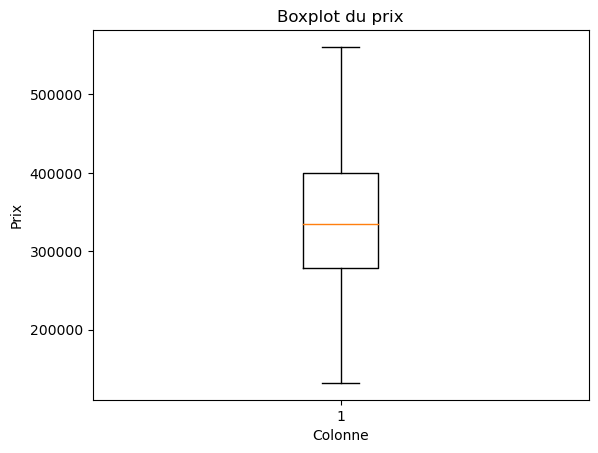

,nb_elements,valeur_fonciere,code_commune,surface_reelle_bati,somme_terrain,local_dependance,local_terrain,nombre_pieces_principales,prix_mcarr_moy_ville,prix_m_carre
count,6061.00000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000,6061.000000
mean,1.61244,340436.391155,91374.051147,92.474674,478.548259,0.371391,0.241049,4.314470,3697.958164,3865.641036
std,0.95636,89935.140543,200.029532,26.466672,313.785685,0.630234,0.672764,1.099551,605.991244,1164.737985
min,1.00000,132207.000000,91016.000000,31.000000,27.000000,0.000000,0.000000,2.000000,1623.616236,1023.489933
25%,1.00000,278500.000000,91201.000000,74.000000,300.000000,0.000000,0.000000,4.000000,3331.184474,3115.044248
50%,1.00000,335000.000000,91386.000000,90.000000,415.000000,0.000000,0.000000,4.000000,3588.847471,3686.046512
75%,2.00000,400000.000000,91552.000000,110.000000,586.000000,1.000000,0.000000,5.000000,4061.578345,4421.052632
max,11.00000,560650.000000,91692.000000,161.000000,4570.000000,5.000000,8.000000,7.000000,6001.813700,12571.428571


In [10]:
from scipy import stats

# Calculez les Z-scores pour une colonne spécifique
z_scores = np.abs(stats.zscore(df_maisons['valeur_fonciere']))

seuil = 2

df_maisons = df_maisons[(z_scores < seuil)]

plt.boxplot([df_maisons['valeur_fonciere']])

# Ajouter un titre et des labels d'axe
plt.title('Boxplot du prix')
plt.xlabel('Colonne')
plt.ylabel('Prix')

# Afficher le graphique
plt.show()

df_maisons.describe()

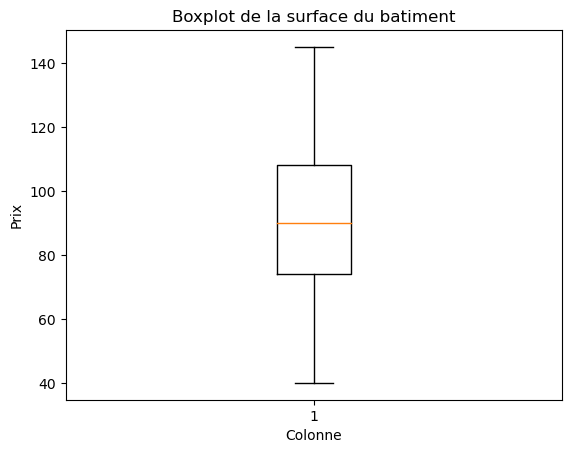

In [11]:
z_scores = np.abs(stats.zscore(df_maisons['surface_reelle_bati']))

seuil = 2

df_maisons = df_maisons[(z_scores < seuil)]

plt.boxplot([df_maisons['surface_reelle_bati']])

# Ajouter un titre et des labels d'axe
plt.title('Boxplot de la surface du batiment')
plt.xlabel('Colonne')
plt.ylabel('Prix')

# Afficher le graphique
plt.show()

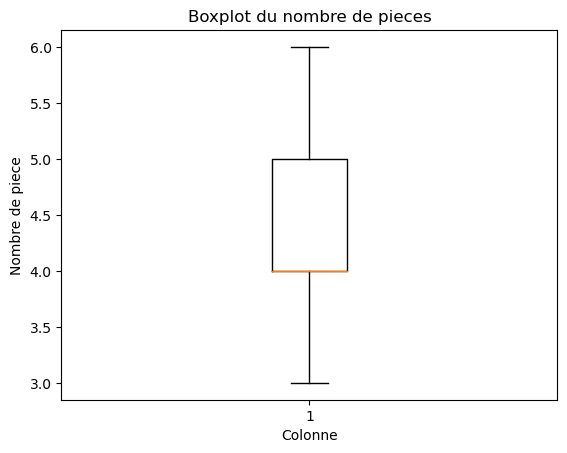

In [12]:
z_scores = np.abs(stats.zscore(df_maisons['nombre_pieces_principales']))

seuil = 2

df_maisons = df_maisons[(z_scores < seuil)]

plt.boxplot([df_maisons['nombre_pieces_principales']])

# Ajouter un titre et des labels d'axe
plt.title('Boxplot du nombre de pieces')
plt.xlabel('Colonne')
plt.ylabel('Nombre de piece')

# Afficher le graphique
plt.show()

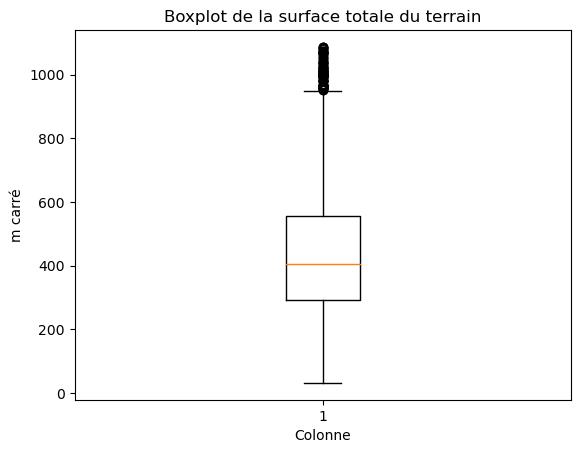

In [13]:
z_scores = np.abs(stats.zscore(df_maisons['somme_terrain']))

seuil = 2

df_maisons = df_maisons[(z_scores < seuil)]

plt.boxplot([df_maisons['somme_terrain']])

# Ajouter un titre et des labels d'axe
plt.title('Boxplot de la surface totale du terrain')
plt.xlabel('Colonne')
plt.ylabel('m carré')

# Afficher le graphique
plt.show()

In [14]:
df_maisons.shape

(5302, 14)

On a donc, après traitement des données, 6428 maisons vendues dans le 91

---

Création de la colonne prix au m² moyen par ville

Affichage par ville du prix moyen au m² par ordre décroissant

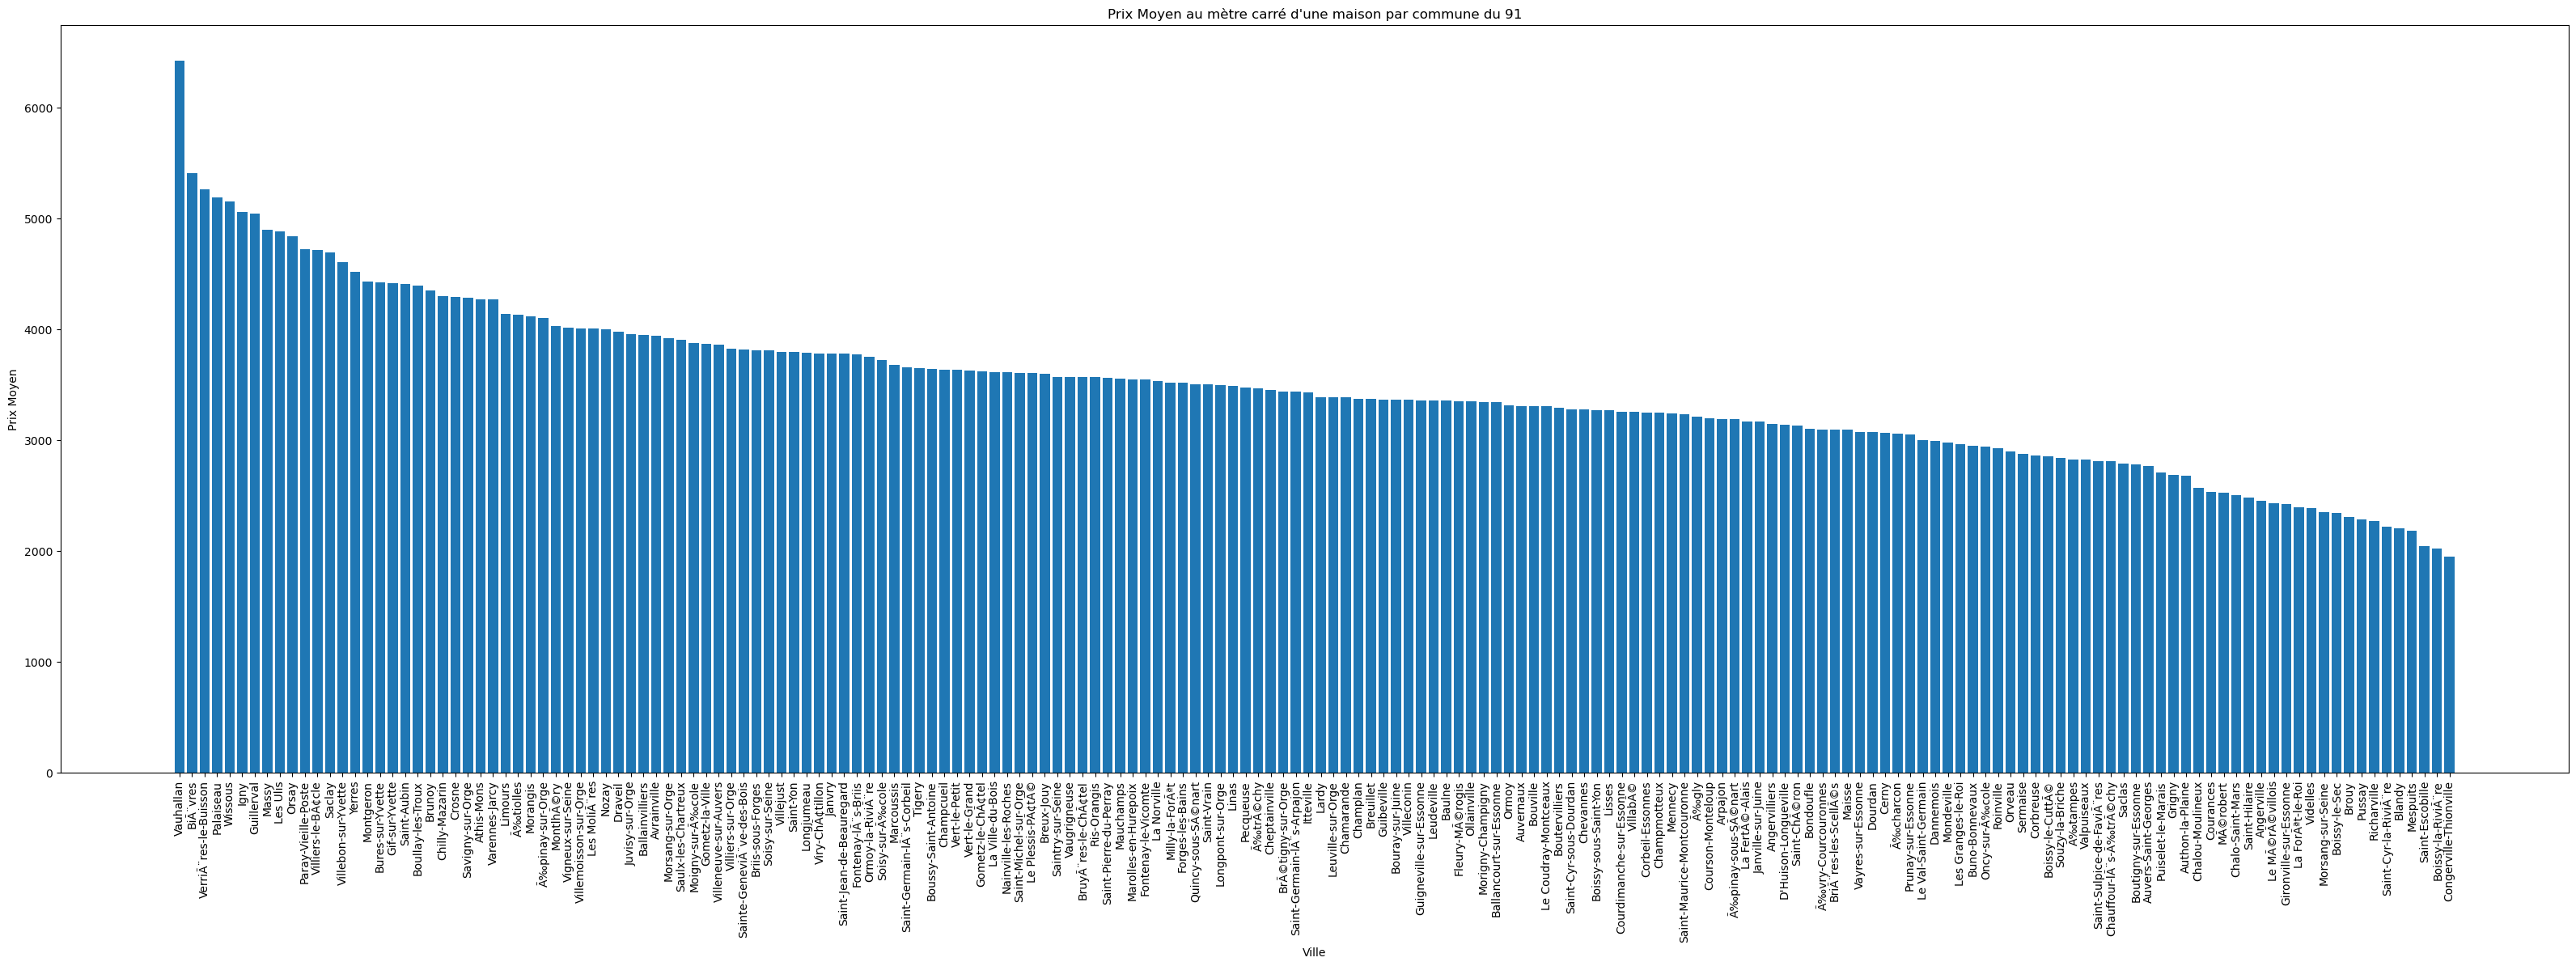

In [15]:
prix_ville = df_maisons.groupby('code_commune')['valeur_fonciere'].sum()
mcarre_ville = df_maisons.groupby('code_commune')['surface_reelle_bati'].sum()
ville = df_maisons['nom_commune'].unique()

prix_mcarr_ville = pd.DataFrame({'nom_commune': ville, 
                                 'prix_ville': prix_ville.values,
                                 'surface_ville' : mcarre_ville.values
                                })

prix_mcarr_ville['prix_mcarr_moy_ville'] = prix_mcarr_ville['prix_ville']/prix_mcarr_ville['surface_ville']

prix_mcarr_ville = prix_mcarr_ville.sort_values(by='prix_mcarr_moy_ville', ascending=False)

prix_mcarr_ville = prix_mcarr_ville[['nom_commune', 'prix_mcarr_moy_ville']]

plt.figure(figsize=(40, 12))
# Créer le graphe en barres
plt.bar(x = prix_mcarr_ville['nom_commune'],
        height = prix_mcarr_ville['prix_mcarr_moy_ville'])

# Personnaliser le graphe
plt.xticks(rotation=90)
plt.title("Prix Moyen au mètre carré d'une maison par commune du 91")
plt.xlabel('Ville')
plt.ylabel('Prix Moyen')

# Afficher le graphe
plt.show()

In [16]:
df_maisons[df_maisons['nom_commune']=='Plessis-Saint-Benoist']

,date_mutation,nb_elements,valeur_fonciere,code_commune,nom_commune,surface_reelle_bati,somme_terrain,local_dependance,local_terrain,nombre_pieces_principales,l_code_nature_culture,l_code_nature_culture_speciale,prix_mcarr_moy_ville,prix_m_carre


Corrélations entre les différentes variables

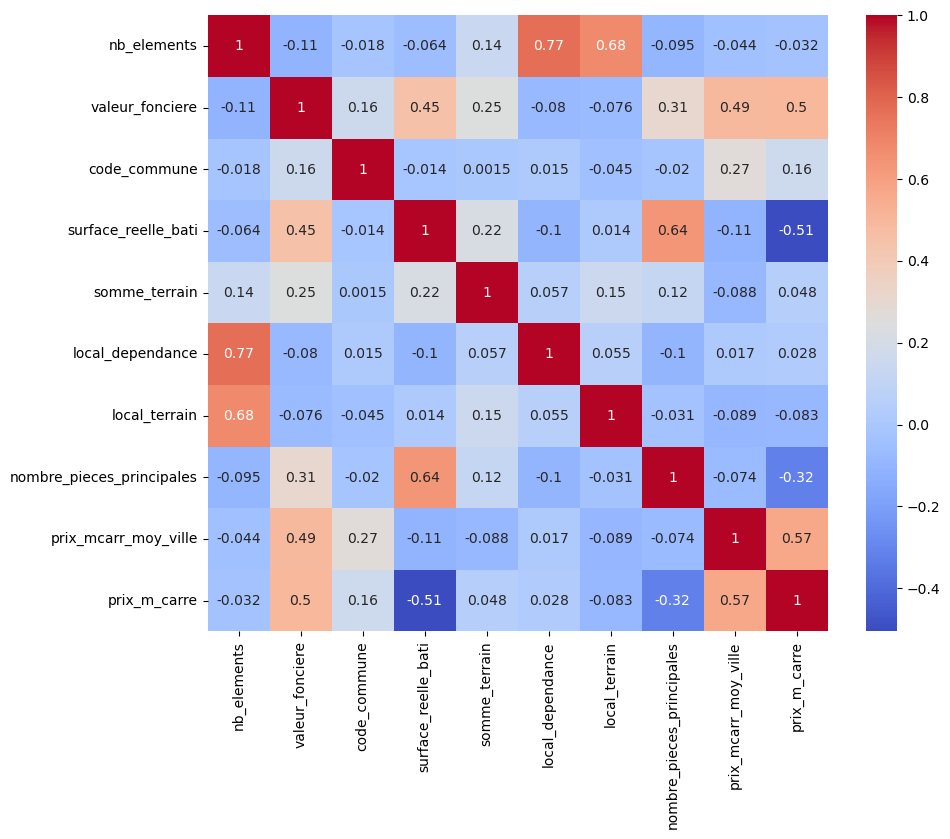

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
mat = df_maisons.corr()
sns.heatmap(mat, annot=True, cmap ="coolwarm");

Corrélation qui n'est pas forte mais plus élevée entre prix_m_carre et la surface, le nombre de pièces, le code commune et somme_terrain

In [18]:
nom_fichier = r'../data/df_maisons_trait_2022_91.csv'
df_maisons.to_csv(nom_fichier, index=False)

Enregistrement du nouveau dataframe

## II- Entrainement des modèles

### 1er modèle : Moyenne

In [19]:
from sklearn.model_selection import cross_validate, cross_val_predict 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
data = df_maisons[['surface_reelle_bati', 'nombre_pieces_principales', 'somme_terrain', 'code_commune', 'prix_mcarr_moy_ville']]
target = df_maisons['prix_m_carre']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=101)

mean_value = np.mean(y_train)

predictions = np.full_like(y_test, fill_value=mean_value)

from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

percentage_errors = (y_test - predictions) / y_test
mape = np.mean(np.abs(percentage_errors)) * 100  



print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"MAE: {mae}")
print(f"R2: {r2}")
print(f"MAPE: {mape}%")


MSE: 1289927.0342058104
RMSE: 1135.7495473060117
MAE: 852.3046724756383
R2: -0.0017003073126635737
MAPE: 23.97681650850349%


Issu de ce premier modèle, on obtient trois métriques
* l' Erreur Quadratique Moyenne, attention cependant à l'unité du modèle
* la Racine Carrée de l' Erreur Quadratique Moyenne, peut-être plus adaptée
* l'Erreur Moyenne Absolue
* le R² 
* la MAPE est pour moi la plus utile car elle est utile pour des valeurs dont l'étendue est grande

Le but de ce premier modèle est de s'en servir comme base, et voir si les modèles suivant son capable de générer une MAPE plus basse.

### 2ème modèle : Regression Linéaire

In [21]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

LinearRegression()

In [22]:
pred = model_1.predict(X_train)
pred_test = model_1.predict(X_test)


mse = mean_squared_error(y_train, pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, pred)
r2 = r2_score(y_train, pred)

mse_test = mean_squared_error(y_test, pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, pred_test)
r2_test = r2_score(y_test, pred_test)
percentage_errors = (y_test - pred_test) / y_test
mape = np.mean(np.abs(percentage_errors)) * 100   

# Affichez les métriques
print(f"MSE train: {mse}")
print(f"MSE test: {mse_test}")
print(f"RMSE train: {rmse}")
print(f"RMSE test: {rmse_test}")
print(f"MAE train: {mae}")
print(f"MAE test: {mae_test}")
print(f"R-squared train: {r2}")
print(f"R-squared test: {r2_test}")
print(f"MAPE: {mape}%")



MSE train: 517519.380195311
MSE test: 575420.9269519357
RMSE train: 719.3881985376956
RMSE test: 758.5650446414834
MAE train: 518.908802531942
MAE test: 545.553819302486
R-squared train: 0.5630735146819007
R-squared test: 0.5531535473890021
MAPE: 15.50644043270261%


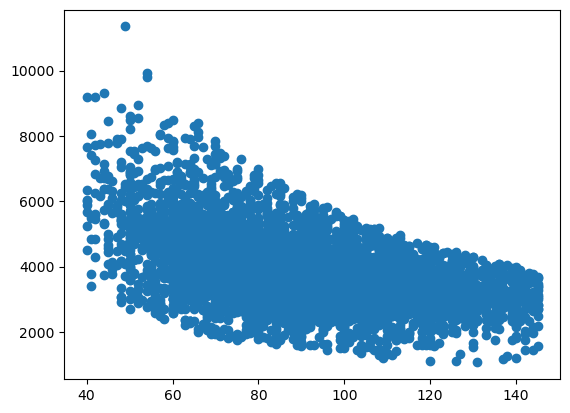

In [23]:
plt.scatter(x = df_maisons['surface_reelle_bati'], y =df_maisons['prix_m_carre'])

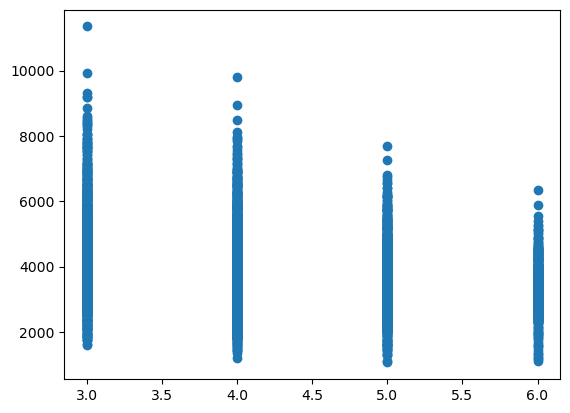

In [24]:
plt.scatter(x = df_maisons['nombre_pieces_principales'], y =df_maisons['prix_m_carre'])

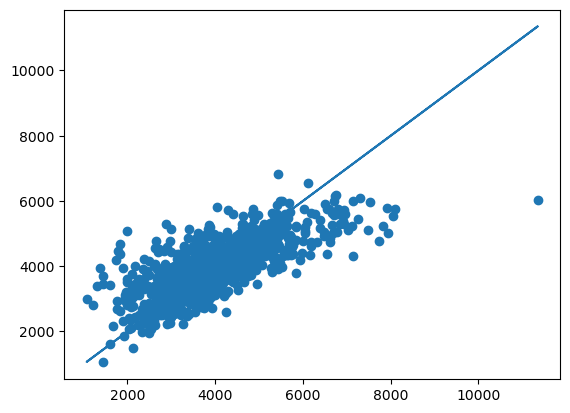

In [27]:
pred_test = model_1.predict(X_test)

plt.scatter(y_test, pred_test)
plt.plot(y_test,y_test)

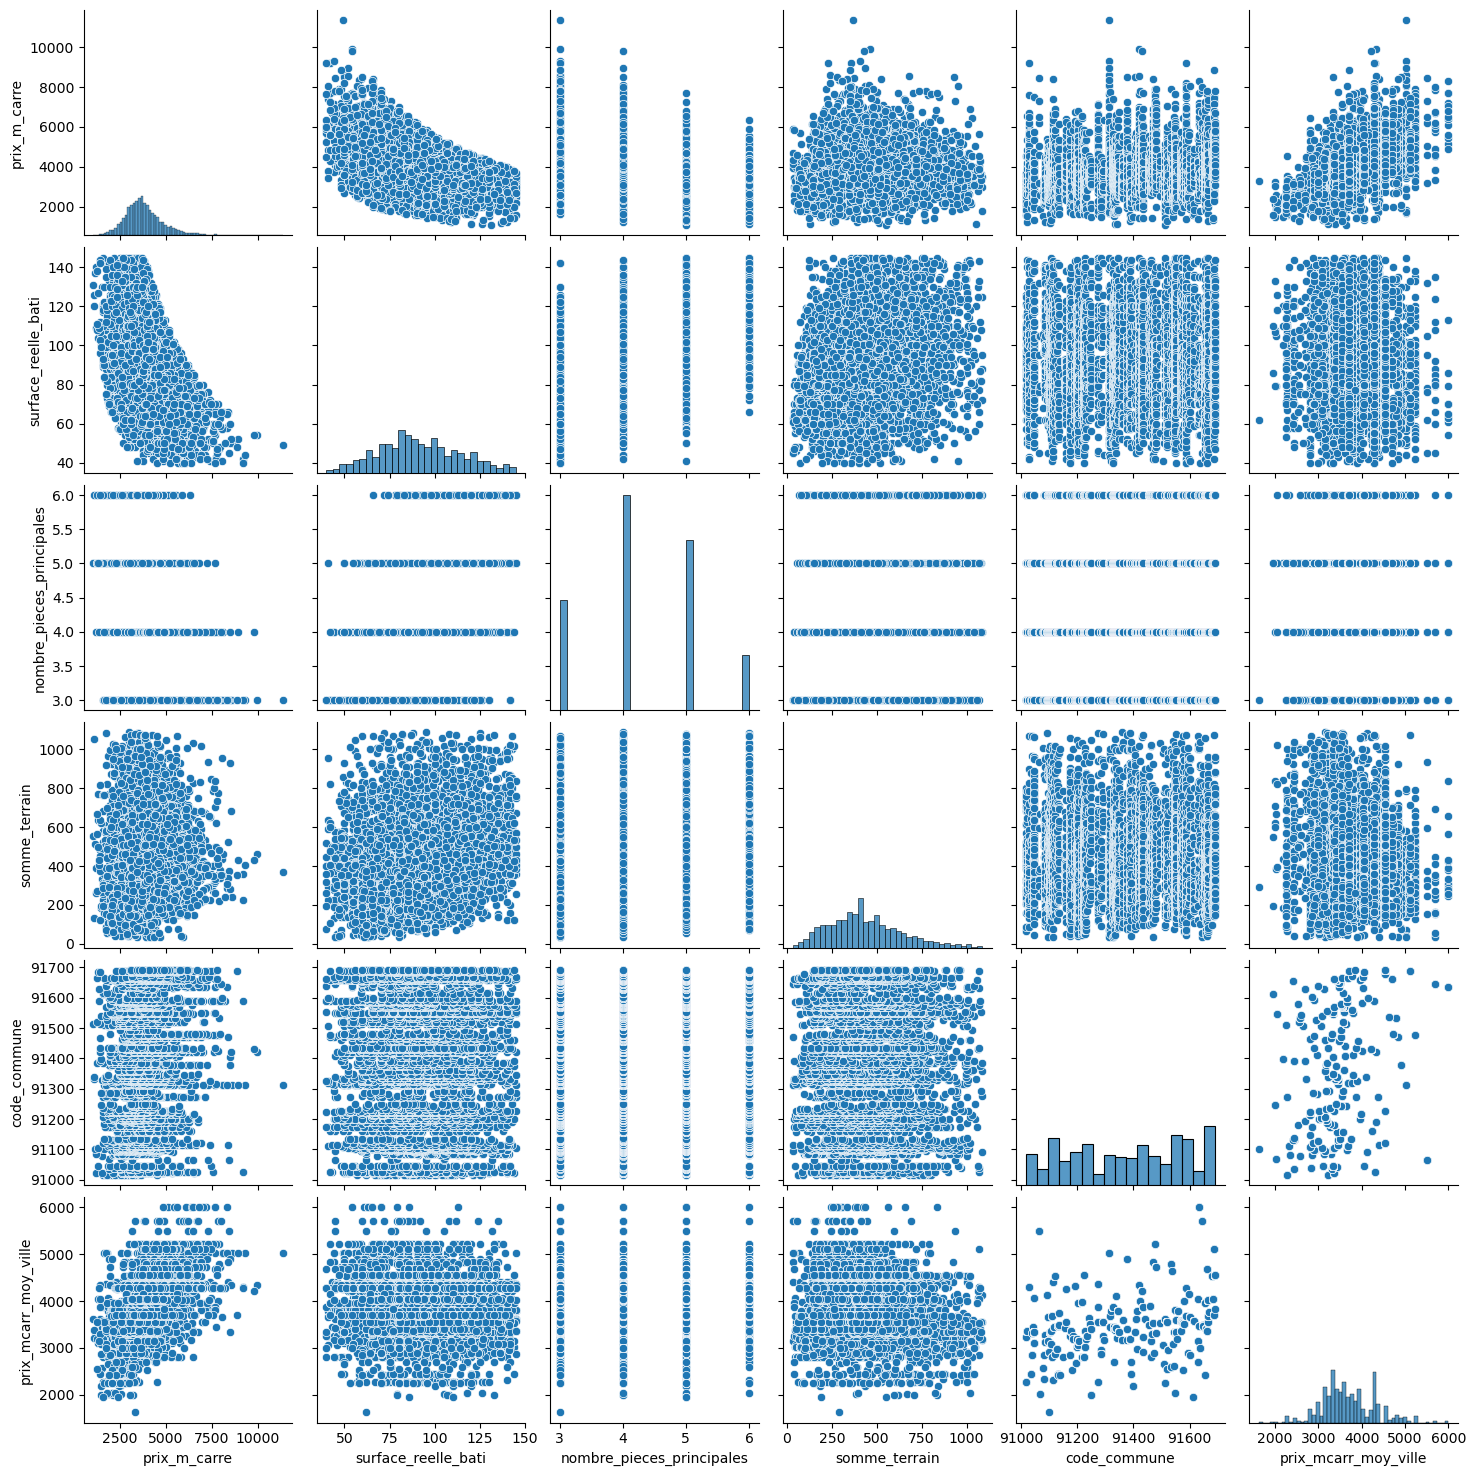

In [28]:
sns.pairplot(df_maisons[['prix_m_carre', 'surface_reelle_bati', 'nombre_pieces_principales', 'somme_terrain', 'code_commune', 'prix_mcarr_moy_ville']]);

Ces graphiques sont utiles pour montrer qu'on a pas un modèle linéaire, il faut donc partir sur une régression non linéaire.

### 3eme modele: Non linéaire
#### Random Forest


In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
model = RandomForestRegressor(n_estimators=100, random_state=42)  # Exemple d'hyperparamètres
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [32]:
percentage_errors = (y_test - y_pred) / y_test
mape = np.mean(np.abs(percentage_errors)) * 100  
print(f"MAPE: {mape}%")

MAPE: 15.559783818108377%


In [33]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MSE: 564260.6615380639
RMSE: 751.1728572958849
R-squared: 0.561820116116007


Après une étude sans optimiser les hyper-paramètres, cherchons maintenant à les optimiser grâce à GridSearchCV

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Meilleurs paramètres trouvés par Grid Search:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

percentage_errors = (y_test - y_pred) / y_test
mape = np.mean(np.abs(percentage_errors)) * 100
print(f"MAPE: {mape}%")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

Meilleurs paramètres trouvés par Grid Search: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
MAPE: 15.177851955033631%
MSE: 545625.8653086841
RMSE: 738.6649208597116
R-squared: 0.5762910750266181


#### Grandient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

In [36]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # Exemple d'hyperparamètres
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [37]:
y_pred = model.predict(X_test)

In [38]:
percentage_errors = (y_test - y_pred) / y_test
mape = np.mean(np.abs(percentage_errors)) * 100
print(f"MAPE: {mape}%")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

MAPE: 15.218890073158473%
MSE: 539486.4735494523
RMSE: 734.4974292327048
R-squared: 0.5810586552453874


De même, cherchons à optimiser les hyper-paramètres.

In [39]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

model = GradientBoostingRegressor(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Meilleurs paramètres trouvés par Grid Search:", best_params)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


percentage_errors = (y_test - y_pred) / y_test
mape = np.mean(np.abs(percentage_errors)) * 100
print(f"MAPE: {mape}%")

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

Meilleurs paramètres trouvés par Grid Search: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
MAPE: 15.218890073158473%
MSE: 539486.4735494523
RMSE: 734.4974292327048
R-squared: 0.5810586552453874


## Conclusion:

Ici, notre meilleur modèle, avec une MAPE de 15.17%, est le Random Forest Regressor avec les paramètres suivants {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}